# Uppgift 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px

## Studie av hur kostanader för grundskolan spelar roll beroende på vart i landet man bor

### Totala kostnader per elev och kommun

In [4]:
df_cost = pd.read_excel("..\data\Grundskola - Kostnader per kommun 2022 Kommun.xlsx", skiprows=7)
df_cost.head()

,Kommun,Kommunkod,Län,Läns-kod,Typ av huvudman,Genomsnittligt elevantal,Totalt,Undervisning,Totalt per elev,Undervisning per elev,Lokaler per elev,Måltider per elev,Lärverktyg per elev,Elevhälsa per elev,Övrigt per elev
0,Berg,2326,Jämtlands län,23,Kommunal,632,111375,56015,176200,88600,26300,16900,6100,4190,34100
1,Övertorneå,2518,Norrbottens län,25,Kommunal,278,47281,29135,170100,104800,25200,16000,4200,4020,15900
2,Skinnskatteberg,1904,Västmanlands län,19,Kommunal,356,60435,34617,170000,97400,23600,9900,3400,5110,30500
3,Bräcke,2305,Jämtlands län,23,Kommunal,558,93610,47736,167800,85500,26000,10400,3100,5120,37600
4,Överkalix,2513,Norrbottens län,25,Kommunal,175,29273,16448,167300,94000,21600,9800,5800,6310,29800


In [6]:
df_sorted_cost = df_cost.sort_values(by="Totalt per elev", key=lambda col: col.astype(str).str.replace('.', '').astype(float))
df_sorted_cost

,Kommun,Kommunkod,Län,Läns-kod,Typ av huvudman,Genomsnittligt elevantal,Totalt,Undervisning,Totalt per elev,Undervisning per elev,Lokaler per elev,Måltider per elev,Lärverktyg per elev,Elevhälsa per elev,Övrigt per elev
289,Täby,160,Stockholms län,1,Kommunal,5792,621372,368839,107300,63700,15300,6300,2900,3700,15400
288,Lerum,1441,Västra Götalands län,14,Kommunal,5610,611257,369793,109000,65900,17900,6100,4800,4620,9600
287,Järfälla,123,Stockholms län,1,Kommunal,7480,817950,497290,109400,66500,15500,6600,4300,5210,11200
286,Nacka,182,Stockholms län,1,Kommunal,9316,1019671,641573,109500,68900,19100,5200,2500,3250,10400
285,Tyresö,138,Stockholms län,1,Kommunal,5185,568165,315784,109600,60900,16000,5300,4500,3750,19200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Överkalix,2513,Norrbottens län,25,Kommunal,175,29273,16448,167300,94000,21600,9800,5800,6310,29800
3,Bräcke,2305,Jämtlands län,23,Kommunal,558,93610,47736,167800,85500,26000,10400,3100,5120,37600
2,Skinnskatteberg,1904,Västmanlands län,19,Kommunal,356,60435,34617,170000,97400,23600,9900,3400,5110,30500
1,Övertorneå,2518,Norrbottens län,25,Kommunal,278,47281,29135,170100,104800,25200,16000,4200,4020,15900


In [8]:
df_highschool = pd.read_excel("..\data\Gymnasieskola - Personalstatistik 2022 Län.xlsx", skiprows=8)
df_highschool.head()

,Län,Läns-kod,Lärare och rektor,Rektor,Lärare,Andel kvinnor,Andel med pedagogisk högskole-examen,Andel med specialped. högskole-examen,Elever per lärare,Studie- och yrkesvägledare (SYV),Elever per SYV,Andel tillsvidare-anställda
0,Kronobergs län,7,705.1,21.8,683.3,48.5,80.4,3.4,11.4,14.8,527.0,92.7
1,Gävleborgs län,21,916.7,28.7,888.0,50.0,77.0,2.4,11.2,25.5,391.1,92.1
2,Kalmar län,8,805.8,31.2,774.6,48.6,80.4,3.1,11.0,22.5,380.5,92.1
3,Jönköpings län,6,1257.2,49.4,1207.8,50.8,79.7,3.9,11.1,27.9,479.3,91.6
4,Uppsala län,3,1084.8,28.0,1056.8,54.3,83.7,3.1,12.3,32.8,397.3,91.5


In [33]:
df_sorted_highschool = df_highschool.sort_values(by="Andel med pedagogisk högskole-examen", key=lambda col: col.astype(str).str.replace('.', '').astype(float), ascending=False)
df_sorted_highschool

,Län,Läns-kod,Lärare och rektor,Rektor,Lärare,Andel kvinnor,Andel med pedagogisk högskole-examen,Andel med specialped. högskole-examen,Elever per lärare,Studie- och yrkesvägledare (SYV),Elever per SYV,Andel tillsvidare-anställda
9,Hallands län,13,1105.1,45.8,1059.2,53.0,86.0,4.3,11.7,30.3,410.3,89.6
12,Stockholms län,1,5789.1,166.3,5622.8,53.3,85.0,2.9,15.1,145.7,581.8,89.4
14,Västra Götalands län,14,5033.7,195.1,4838.6,51.9,84.0,3.7,12.4,80.7,741.5,89.3
4,Uppsala län,3,1084.8,28.0,1056.8,54.3,83.7,3.1,12.3,32.8,397.3,91.5
10,Skåne län,12,4006.9,131.4,3875.4,51.8,83.1,4.8,12.6,106.9,457.2,89.5
11,Örebro län,18,979.0,37.5,941.5,51.6,83.1,4.3,11.6,19.4,562.8,89.5
5,Östergötlands län,5,1443.3,60.6,1382.7,51.9,80.6,3.6,11.9,30.5,541.1,90.3
0,Kronobergs län,7,705.1,21.8,683.3,48.5,80.4,3.4,11.4,14.8,527.0,92.7
2,Kalmar län,8,805.8,31.2,774.6,48.6,80.4,3.1,11.0,22.5,380.5,92.1
3,Jönköpings län,6,1257.2,49.4,1207.8,50.8,79.7,3.9,11.1,27.9,479.3,91.6


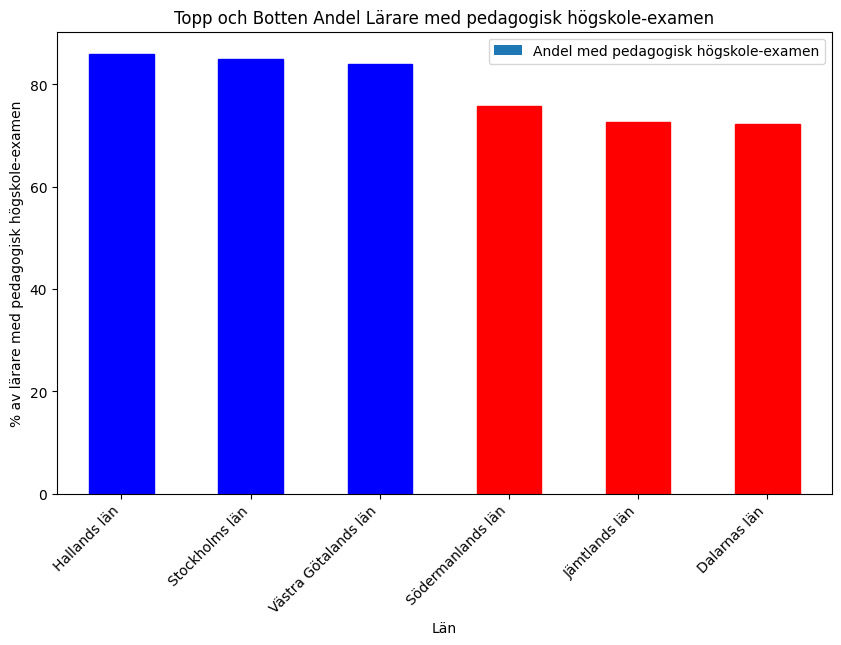

In [39]:
df_combined = pd.concat([df_sorted_highschool.head(3), df_sorted_highschool.tail(3)])

# Skapa ett stapeldiagram
ax = df_combined.plot(kind="bar", y="Andel med pedagogisk högskole-examen", x="Län", figsize=(10, 6), rot=0)

# Hjälp från chatgpt
colors = ['b']*3 + ['r']*3

# Loop to give the color of the bar
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

ax.set_title("Topp och Botten Andel Lärare med pedagogisk högskole-examen")
ax.set_xlabel("Län")
ax.set_ylabel("% av lärare med pedagogisk högskole-examen")

plt.xticks(rotation=45, ha='right')
plt.tight_layout
plt.show()

In [26]:
df_student_per_teacher = pd.read_excel("..\data\Gymnasieskola - Personalstatistik 2022 Län.xlsx", skiprows=8)
df_student_per_teacher.head()

,Län,Läns-kod,Lärare och rektor,Rektor,Lärare,Andel kvinnor,Andel med pedagogisk högskole-examen,Andel med specialped. högskole-examen,Elever per lärare,Studie- och yrkesvägledare (SYV),Elever per SYV,Andel tillsvidare-anställda
0,Kronobergs län,7,705.1,21.8,683.3,48.5,80.4,3.4,11.4,14.8,527.0,92.7
1,Gävleborgs län,21,916.7,28.7,888.0,50.0,77.0,2.4,11.2,25.5,391.1,92.1
2,Kalmar län,8,805.8,31.2,774.6,48.6,80.4,3.1,11.0,22.5,380.5,92.1
3,Jönköpings län,6,1257.2,49.4,1207.8,50.8,79.7,3.9,11.1,27.9,479.3,91.6
4,Uppsala län,3,1084.8,28.0,1056.8,54.3,83.7,3.1,12.3,32.8,397.3,91.5


In [32]:
df_sorted_stu_per_teacher = df_student_per_teacher.sort_values(by="Elever per lärare", key=lambda col: col.astype(str).str.replace('.', '').astype(float), ascending=False)
df_sorted_stu_per_teacher

,Län,Läns-kod,Lärare och rektor,Rektor,Lärare,Andel kvinnor,Andel med pedagogisk högskole-examen,Andel med specialped. högskole-examen,Elever per lärare,Studie- och yrkesvägledare (SYV),Elever per SYV,Andel tillsvidare-anställda
12,Stockholms län,1,5789.1,166.3,5622.8,53.3,85.0,2.9,15.1,145.7,581.8,89.4
10,Skåne län,12,4006.9,131.4,3875.4,51.8,83.1,4.8,12.6,106.9,457.2,89.5
8,Södermanlands län,4,866.5,26.5,840.0,52.7,75.7,2.7,12.6,19.0,557.2,90.1
14,Västra Götalands län,14,5033.7,195.1,4838.6,51.9,84.0,3.7,12.4,80.7,741.5,89.3
4,Uppsala län,3,1084.8,28.0,1056.8,54.3,83.7,3.1,12.3,32.8,397.3,91.5
13,Västmanlands län,19,840.6,32.0,808.6,53.6,77.7,3.0,12.1,22.8,428.1,89.4
5,Östergötlands län,5,1443.3,60.6,1382.7,51.9,80.6,3.6,11.9,30.5,541.1,90.3
9,Hallands län,13,1105.1,45.8,1059.2,53.0,86.0,4.3,11.7,30.3,410.3,89.6
11,Örebro län,18,979.0,37.5,941.5,51.6,83.1,4.3,11.6,19.4,562.8,89.5
20,Gotlands län,9,158.1,2.0,156.1,53.4,77.1,3.8,11.5,0.5,3594.0,78.8


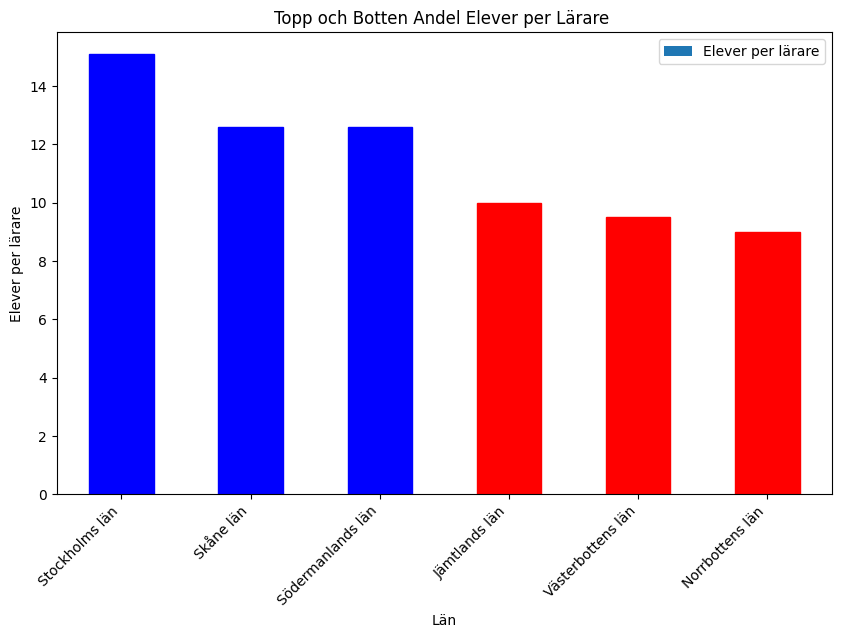

In [40]:
df_combined = pd.concat([df_sorted_stu_per_teacher.head(3), df_sorted_stu_per_teacher.tail(3)])

# Skapa ett stapeldiagram
ax = df_combined.plot(kind="bar", y="Elever per lärare", x="Län", figsize=(10, 6), rot=0)


colors = ['b']*3 + ['r']*3

# Loop to give the color of the bar
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

ax.set_title("Topp och Botten Andel Elever per Lärare ")
ax.set_xlabel("Län")
ax.set_ylabel("Elever per lärare")

plt.xticks(rotation=45, ha='right')
plt.tight_layout
plt.show()